<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/machine_learning/lessons/machine_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer l√°t√°s betan√≠tott modellek alapj√°n

**Megjegyz√©s**

K√©rj√ºk kapcsolja be a GPU t√°mogat√°st a Colab virtu√°lis g√©pen. V√°lassza a  men√ºb≈ël az
**Edit/Notebook settings** √©s v√°lassza a T4 GPU-t. Ezut√°n a k√∂vetkez≈ë k√≥dblokknak a *Tesla T4* sz√∂veget kell ki√≠rnia.

In [1]:
!nvidia-smi -q -i 0 | grep "Product Name"

    Product Name                          : Tesla T4


## K√©p oszt√°lyoz√°s

A mesters√©ges intelligencia, g√©pi tanul√°s √©s neur√°lis h√°l√≥zatok seg√≠ts√©g√©vel egyre jobb modelleket dolgoznak ki a k√©pek oszt√°lyoz√°s√°ra.
A megoldand√≥ feladat, hogy egy eddig nem l√°tott k√©pet "megmutatva" a modell felhaszn√°l√°s√°val a sz√°m√≠t√≥g√©p mondja meg, ogy mi van a k√©pen. Sz√°mos k√©sz, szabadon let√∂lthet≈ë, m√°r betan√≠tott modell is rendelkez√©s√ºnkre √°ll.

El≈ësz√∂r a DenseNet-Caffe modellt (Densely Connected Convolutional Networks - https://arxiv.org/abs/1608.06993) haszn√°ljuk az ImageNet Large Scale Visual Recognition Challenge 2012 (ILSVRC2012) verseny√©r≈ël. 1000 oszt√°ly megk√ºl√∂nb√∂ztet√©s√©re tan√≠tott√°k meg a modellt



In [2]:
import requests
import imutils
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL

El≈ësz√∂r t√∂lts√ºk le a betan√≠tott *caffe* modelt.



In [3]:
!wget -q -O sample_data/classification_classes_ILSVRC2012.txt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/classification_classes_ILSVRC2012.txt
!wget -q -O sample_data/DenseNet_121.caffemodel https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/DenseNet_121.caffemodel
!wget -q -O sample_data/DenseNet_121.prototxt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/DenseNet_121.prototxt

T√∂lts√ºk be a let√∂lt√∂tt modellt.

In [4]:
# ImageNet oszt√°ly nevek
with open('sample_data/classification_classes_ILSVRC2012.txt', 'r') as f:
   class_names = f.read().split('\n')
model = cv2.dnn.readNet(model='sample_data/DenseNet_121.caffemodel',
                        config='sample_data/DenseNet_121.prototxt',
                        framework='Caffe')
print(class_names[:20])

['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus', 'brambling, Fringilla montifringilla', 'goldfinch, Carduelis carduelis', 'house finch, linnet, Carpodacus mexicanus', 'junco, snowbird', 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 'robin, American robin, Turdus migratorius', 'bulbul', 'jay', 'magpie', 'chickadee']


Egy Python f√ºggv√©nyt k√©sz√≠t√ºnk egy k√©p oszt√°lyoz√°s√°hoz. We create a function to use the model for an image. During the pre-processing image is scaled down and mean is sustracted.

In [5]:
def classify_img(image):
    """ k√©p oszt√°lyoz√°s caffe modellel """
    # blob k√©sz√≠t√©se a k√©pb√∂l 224 x 224 m√©retre cs√∂kkent√©s
    blob = cv2.dnn.blobFromImage(image=image, scalefactor=0.01, size=(224, 224),
                                 mean=(104, 117, 123))
    model.setInput(blob)        # bemenet be√°ll√≠t√°sa a neur√°lis h√°l√≥zathoz

    outputs = model.forward()   # k√©p √°tk√ºld√©se a neur√°lis h√°l√≥n
    final_outputs = outputs[0]
    final_outputs = final_outputs.reshape(1000, 1)  # 1D t√∂bb√© konvert√°l√°s

    label_id = np.argmax(final_outputs) # legnagyobb val√≥sz√≠n≈±s√©g≈± oszt√°ly indexe
    # convert the output scores to softmax probabilities
    probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))
    final_prob = np.max(probs)      # legnagyobb val√≥sz√≠n≈±s√©g √©rt√©ke
    out_name = class_names[label_id]
    out_text = f"{out_name}, {final_prob:.1%}"
    fig, ax = plt.subplots(1, 1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(out_text)
    ax.axis('off')

Egy minta k√©p let√∂lt√©se a BME √©p√ºletek k√∂z√∂tti √°tj√°r√≥r√≥l.

In [6]:
!wget -q -O sample_data/sh1.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/sh1.jpg

A modell szerint egy kolortort √°br√°zol a k√©p.

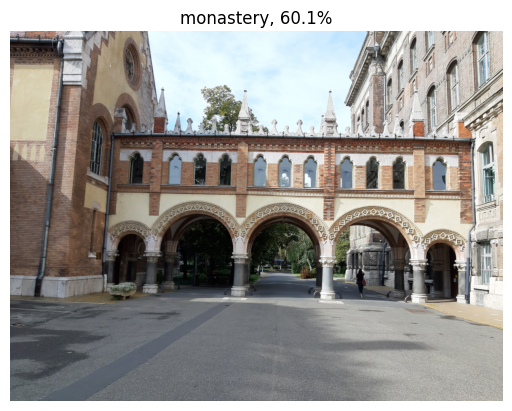

In [7]:
img1 = cv2.imread('sample_data/sh1.jpg')
classify_img(img1)

Az al√°bbi *urls* list√°t kib≈ëv√≠thetj√ºk, fel√ºl√≠rhatjuk az interneten tal√°lhat√≥ k√©pek linkj√©vel.

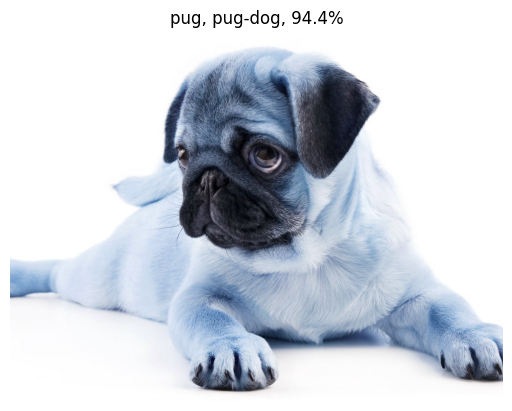

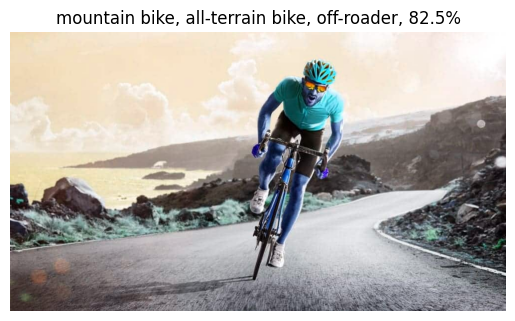

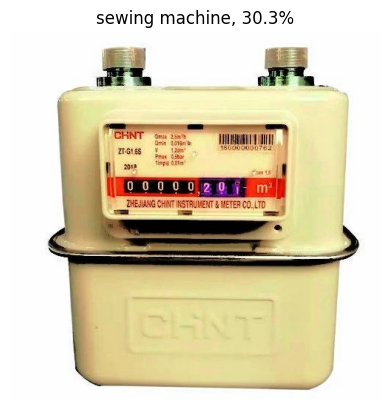

In [8]:
urls = ['https://i.guim.co.uk/img/media/fe1e34da640c5c56ed16f76ce6f994fa9343d09d/0_174_3408_2046/master/3408.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=0d3f33fb6aa6e0154b7713a00454c83d',
        'https://lemonbin.com/wp-content/uploads/2020/06/cyclist-june172020-min.jpg',
        'https://5.imimg.com/data5/TestImages/LC/LC/YS/SELLER-18789923/domestic-diaphragm-type-gas-meter-500x500.jpg']
for url in urls:
    im = np.array(PIL.Image.open(requests.get(url, stream=True).raw))
    classify_img(im)

## CIFAR-10 minta adatok

A CIFAR-10 adatrendszer 60000 32 x 32 felbont√°s√∫ sz√≠nes k√©pet tartalmaz, melyeket 10 oszt√°lyba soroltak (https://www.cs.toronto.edu/~kriz/cifar.html).

Oszt√°lyok:

* rep√ºl≈ëg√©p
* aut√≥
* mad√°r
* macska
* szarvas
* kutya
* b√©ka
* l√≥
* haj√≥
* kamion

A Keras k√∂nyvt√°r seg√≠ts√©g√©vel hozzunk l√©tre egy modellt.


In [9]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from pathlib import Path
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

T√∂lts√ºk le a minta k√©peket √©s n√©zz√ºnk meg n√©h√°ny v√©letlenszer≈±en k√©pet.

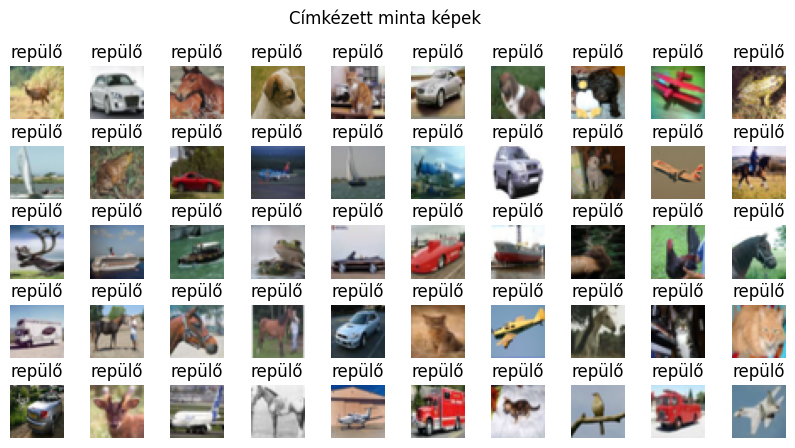

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_labels = [
    "rep√ºl≈ë", # 0
    "aut√≥",      # 1
    "mad√°r",     # 2
    "macska",      # 3
    "szarvas",     # 4
    "kutya",      # 5
    "b√©ka",     # 6
    "l√≥",    # 7
    "haj√≥",     # 8
    "kamion"     # 9
]
num_classes = len(class_labels)

rows = 5; cols = 10
rand_ind = np.random.randint(0, high=1000, size=rows*cols, dtype=int)
fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
fig.suptitle('C√≠mk√©zett minta k√©pek')
axes = axes.ravel()

for i in np.arange(0, rows*cols):
    img_ind = rand_ind[i]
    axes[i].imshow(x_test[img_ind])
    axes[i].set_title(class_labels[np.argmax(y_test[img_ind])])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Hozzuk l√©tre a modell√ºnket √©s tan√≠tsuk be a CIFAR-10 adatk√©szlet felhaszn√°l√°s√°val. Ez kb. n√©h√°ny percet vesz ig√©nybe.

K√©tszer 32 darab, k√©tszer 64 darab √©s k√©tszer 128 darab 3 x 3-as konvol√∫ci√≥s sz≈±r≈ët √©s egy rejtett r√©teget tartalmaz a modell




In [14]:
%%time
# minta k√©pek bet√∂lt√©se
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# k√©pek normaliz√°l√°sa a 0-1 tartom√°nyba
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Oszt√°ly c√≠mk√©k konvert√°l√°sa bin√°ris oszt√°ly m√°trix√°
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

"""
# modell l√©trehoz√°sa √©s r√©tegek hozz√°ad√°sa
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
hist = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test), shuffle=True)
"""
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 20
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
782/782 [==============================] - 21s 14ms/step - loss: 1.7476 - accuracy: 0.4003 - val_loss: 1.5458 - val_accuracy: 0.4666
Epoch 2/20
782/782 [==============================] - 10s 12ms/step - loss: 1.1892 - accuracy: 0.5740 - val_loss: 0.9308 - val_accuracy: 0.6644
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 0.9933 - accuracy: 0.6499 - val_loss: 0.9781 - val_accuracy: 0.6471
Epoch 4/20
782/782 [==============================] - 11s 14ms/step - loss: 0.8874 - accuracy: 0.6872 - val_loss: 0.8855 - val_accuracy: 0.6910
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 0.8109 - accuracy: 0.7195 - val_loss: 0.8182 - val_accuracy: 0.7111
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.7531 - accuracy: 0.7395 - val_loss: 0.6815 - val_accuracy: 0.7669
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 0.7116 - accuracy: 0.7541 - val_loss: 0.8479 - val_accuracy:

Modell pontoss√°g:88.7%
Teszt  pontoss√°g:82.8%


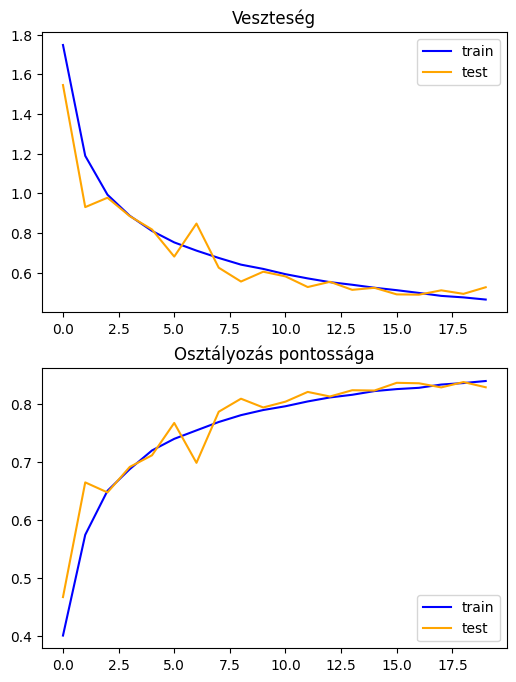

In [15]:
score, acc = model.evaluate(x_train, y_train, batch_size=64, verbose=0)
print(f'Modell pontoss√°g:{acc:.1%}')
score, acc = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print(f'Teszt  pontoss√°g:{acc:.1%}')
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].set_title('Vesztes√©g')
ax[0].plot(history.history['loss'], color='blue', label='train')
ax[0].plot(history.history['val_loss'], color='orange', label='test')
ax[0].legend()
ax[1].set_title('Oszt√°lyoz√°s pontoss√°ga')
ax[1].plot(history.history['accuracy'], color='blue', label='train')
ax[1].plot(history.history['val_accuracy'], color='orange', label='test')
ax[1].legend(loc=4)
plt.subplots_adjust(wspace=0.5)

313/313 [==============================] - 1s 2ms/step


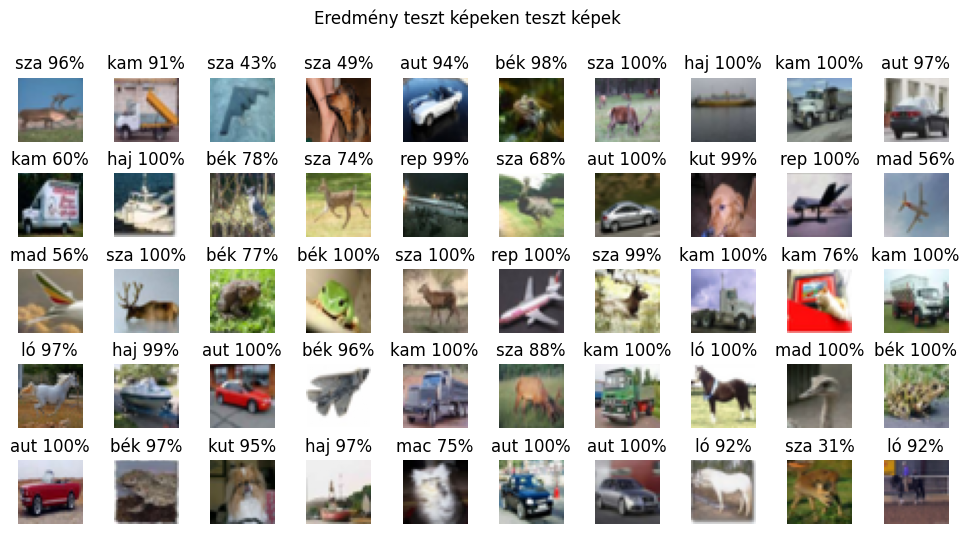

In [16]:
y_pred = model.predict(x_test)
rows = 5; cols = 10
rand_ind = np.random.randint(0, high=10000, size=rows*cols, dtype=int)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.2, rows * 1.2))
fig.suptitle('Eredm√©ny teszt k√©peken teszt k√©pek')
axes = axes.ravel()

for i in np.arange(0, rows*cols):
    img_ind = rand_ind[i]
    axes[i].imshow(x_test[img_ind])
    k = np.argmax(y_pred[img_ind])
    axes[i].set_title(f"{class_labels[k][:3]} {y_pred[img_ind, k]:.0%}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Pr√≥b√°ljuk ki a modellt eddig nem haszn√°lt k√©peken!

In [37]:
# add more images here from the ten classes
!wget -q https://www.shutterstock.com/image-photo/forg-260nw-151350374.jpg
!wget -q https://imagestore1.blogger.hu/25_150709_854054_a2bb73f454241fc91a575ab9596916e3_e27a2a_301.jpg
!wget -q https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Female_bengal_cat_outdoor.jpg/250px-Female_bengal_cat_outdoor.jpg

In [43]:
# collecting images from local folder
import glob
images = glob.glob("*.png") + glob.glob("*.jpg")

Load images and put together in a 4D numpy array

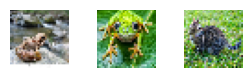

In [44]:
np_images = np.zeros((len(images), 32, 32, 3))
fig, ax = plt.subplots(1, len(images), figsize=(len(images), 1))
ax = ax.ravel()
for i, img_name in enumerate(images):
    # Load and resize to 32x32 pixels (as required by this model)
    img = image.load_img(img_name, target_size=(32, 32))
    # Convert the image to a numpy array
    np_images[i] = image.img_to_array(img)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.5)


Making prediction from the model

In [45]:
results = model.predict(np_images)
preds = np.argmax(results, axis=1)

1/1 [==============================] - 0s 18ms/step


In [46]:
print(results)
print(preds)

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.2272927e-34]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.8657583e-37 0.0000000e+00 4.3230472e-19 0.0000000e+00 2.2492995e-31]]
[1 1 1]


Output results

In [47]:
for i, pred in enumerate(preds):
    print(f"{images[i]} k√©pen egy {class_labels[pred]} van ({results[i, pred]:.1%})")

forg-260nw-151350374.jpg k√©pen egy aut√≥ van (100.0%)
25_150709_854054_a2bb73f454241fc91a575ab9596916e3_e27a2a_301.jpg k√©pen egy aut√≥ van (100.0%)
250px-Female_bengal_cat_outdoor.jpg k√©pen egy aut√≥ van (100.0%)


# Object detection with YOLO5



In [ ]:
%cd
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

/root
Cloning into 'yolov5'...
remote: Enumerating objects: 16413, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16413 (delta 0), reused 3 (delta 0), pack-reused 16408
Receiving objects: 100% (16413/16413), 14.90 MiB | 25.09 MiB/s, done.
Resolving deltas: 100% (11265/11265), done.
/root/yolov5
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 610.1/610.1 kB 5.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 195.4/195.4 kB 7.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 715.9/715.9 kB 9.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.3/3.3 MB 12.8 MB/s eta 0:0

In [ ]:
import glob
import cv2
from matplotlib import pyplot as plt
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 üöÄ v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU


Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 26.4/107.7 GB disk)


In [ ]:
!wget -q -O data/images/stop.jpg https://cdn.powa.com/baderscott.com/images/wp-content/uploads/2020/06/atlanta-ga-car-accident-lawyer-running-a-stop-signal-300x200-245-critical-desktop.jpg.webp

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

100% 14.1M/14.1M [00:00<00:00, 131MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/3 /root/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 335.7ms
image 2/3 /root/yolov5/data/images/stop.jpg: 448x640 1 stop sign, 285.9ms
image 3/3 /root/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 266.8ms
Speed: 1.9ms pre-process, 296.1ms inference, 13.1ms NMS per image at shape (1, 3, 640, 640)
Results 

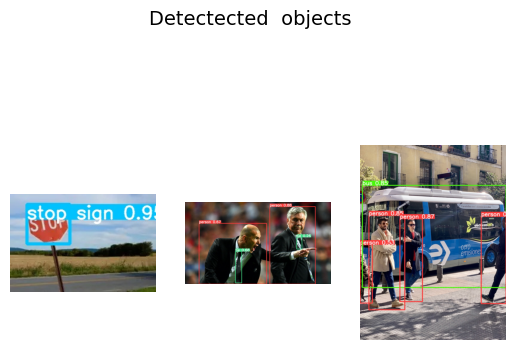

In [ ]:
# get images with detected objects and show them
im_list = glob.glob('runs/detect/exp/*.jpg')
n = len(im_list)
fig, axes = plt.subplots(1, n)
fig.suptitle('Detectected  objects', fontsize=14)
for i in range(n):
    im = cv2.imread(im_list[i])
    axes[i].imshow( cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')